In [1]:
!pip install yahoo-fin 
!pip install pandas 
!pip install fbprophet

     |████████████████████████████████| 81 kB 3.4 MB/s 
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 127 kB 44.5 MB/s 
     |████████████████████████████████| 103 kB 58.8 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=b798219bb0864d4ce21e1fb2f3dff254e7c43a20fbfd363645ea9dc4b88d58ae
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=ec8a3b246a470be7f0cffe5daf1b92c78a95d41da4f2cf9b3cf69d551a202d89
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=c3462eb9034733f5744746eb85d23c48266df99230022c57377f2bef54249b83
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [10]:
from yahoo_fin import stock_info as si
import pandas as pd 
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot
from datetime import date

In [ ]:
!pip list

In [31]:
end = date.today()
d = datetime.timedelta(days=730)
start = end - d

In [32]:
ticker = "RUB=X"
s = si.get_data(ticker, start, end)
s['Date'] = s.index
s.rename({'close': 'Close'}, axis=1, inplace=True)
s.head()


,open,high,low,Close,adjclose,volume,ticker,Date
2019-10-07,64.947197,65.330002,64.747597,64.944099,64.944099,0.0,RUB=X,2019-10-07
2019-10-08,NaN,NaN,NaN,NaN,NaN,NaN,RUB=X,2019-10-08
2019-10-09,65.031197,65.031197,64.377602,65.017303,65.017303,0.0,RUB=X,2019-10-09
2019-10-10,64.392998,64.433899,63.989101,64.392700,64.392700,0.0,RUB=X,2019-10-10
2019-10-13,64.206200,64.415001,64.019897,64.239601,64.239601,0.0,RUB=X,2019-10-13


In [33]:
df = pd.DataFrame()
df['ds'] = (s['Date']) 
df['y'] = s['Close'] 
df.head()

,ds,y
2019-10-07,2019-10-07,64.944099
2019-10-08,2019-10-08,NaN
2019-10-09,2019-10-09,65.017303
2019-10-10,2019-10-10,64.392700
2019-10-13,2019-10-13,64.239601


In [34]:
m = Prophet() 
m.fit(df) 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=12 * 8, freq='D') 


In [36]:
forecast = m.predict(future) 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
604,2021-12-24,71.626275,64.813450,79.579436,71.631093,64.497077,79.376761
605,2021-12-25,71.550691,64.008506,79.421001,71.619099,64.251303,79.574605
606,2021-12-26,71.667338,64.241030,79.744026,71.607106,64.194282,79.680069
607,2021-12-27,71.629230,64.175129,79.851692,71.595112,64.079012,79.778023
608,2021-12-28,71.638132,63.812594,79.965713,71.583119,63.970527,79.896642


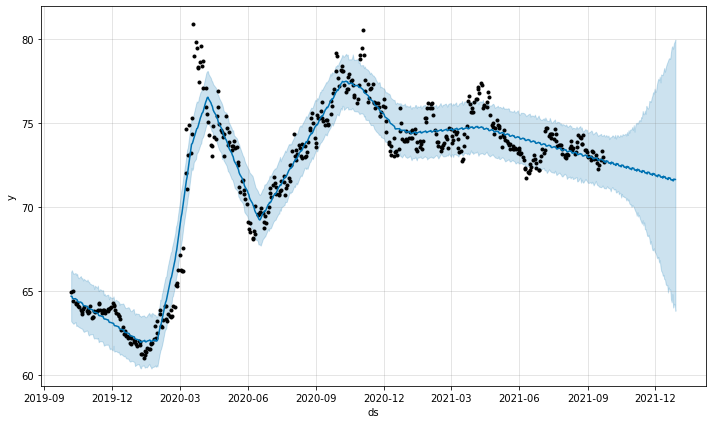

In [37]:
fig1 = m.plot(forecast) 


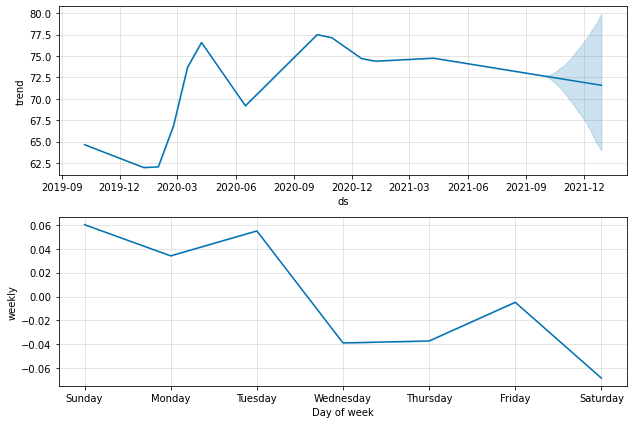

In [38]:
fig2 = m.plot_components(forecast) 


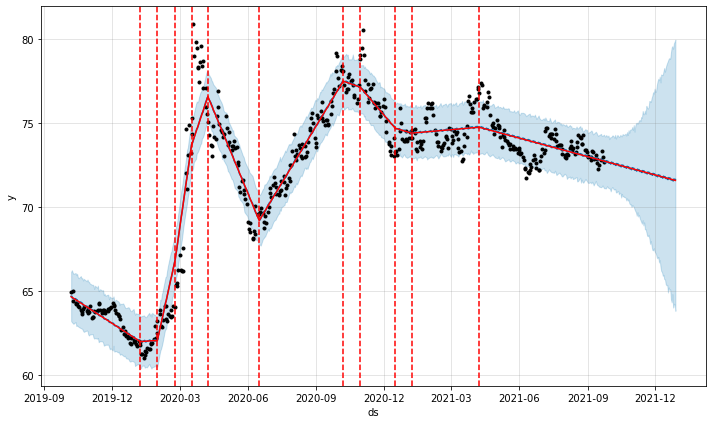

In [39]:
from google.colab import files
fig = m.plot(forecast) 
a = add_changepoints_to_plot(fig.gca(), m, forecast)
fig.savefig('RUBforcast.jpeg', dpi=400, bbox_inches='tight')


TypeError: ignored

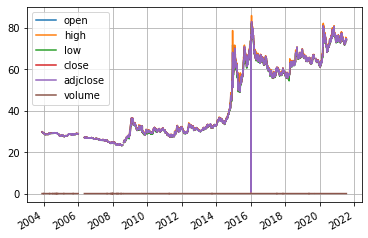

In [ ]:
import pandas as pd
from pandas_datareader import data, wb  # Package and modules for importing data; this code may change depending on pandas version
import matplotlib.pyplot as plt   
    
import datetime
from datetime import date 
import numpy as np
from fbprophet import Prophet
    
end = date.today()
d = datetime.timedelta(days=365)
start = end - d
    
graph = si.get_data(ticker)
 
type(graph)

graph.plot(grid = True)
stock_return = graph.apply(lambda x: x / x[0])
stock_return.head()
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
stock_change = graph.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
graph["20d"] = np.round(graph["Close"].rolling(window = 20, center = False).mean(), 2)


df = pd.DataFrame()
df['ds'] = stock_return.index
df['y']=graph['Close'].apply(lambda x: np.log(x)).values
df.tail()

m0 = Prophet(yearly_seasonality=True)
m0.fit(df)
#how many days in the future to show predictions for 
n_add = 100
print("adding {n} days.".format(n=n_add))
future = m0.make_future_dataframe(periods=n_add) 
future.tail()

forecast = m0.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
forcast = m0.plot(forecast, ylabel='$\ln($stock_return$)$');
forcast.savefig('/home/ubuntu/Desktop/TelegramBot/charts/RUBforcast.jpeg', dpi=400, bbox_inches='tight')


trend = m0.plot_components(forecast);
trend.savefig('/home/ubuntu/Desktop/TelegramBot/charts/RUBtrend.jpeg', dpi=400, bbox_inches='tight')

